# Fairness in Recommender Systems - Literature Review

# Table of Contents

1. [Introduction](#introduction)  
2. [Sources of (un)fairness in recommender systems](#sources-of-unfairness-in-recommender-systems)  
   2.1 [Conflicting fairness definitions](#conflicting-fairness-definitions)  
   2.2 [Algorithmic bias](#algorithmic-bias)  
   2.3 [Data bias](#data-bias)  
   2.4 [Feedback loops](#feedback-loops)  
   2.5 [Cold Start Problem](#cold-start-problem)  
3. [Conceptualizing fairness in recommendation systems](#conceptualizing-fairness-in-recommendation-systems)  
   3.1 [Stakeholder perspectives on fairness](#stakeholder-perspectives-on-fairness)  
   3.2 [Fairness over time](#fairness-over-time)  
   3.3 [Process and outcome fairness](#process-and-outcome-fairness)  
   3.4 [Operationalizing outcome fairness through distributive fairness](#operationalizing-outcome-fairness-through-distributive-fairness)  
   3.5 [Individual and group fairness within distributive fairness](#individual-and-group-fairness-within-distributive-fairness)  
4. [Fairness metrics in recommender systems](#fairness-metrics-in-recommender-systems)  
   4.1 [Individual Fairness Metrics in Practice](#individual-fairness-metrics-in-practice)  
   4.2 [Group Fairness Metrics in Practice](#group-fairness-metrics-in-practice)  
   4.3 [Bridging Metrics: Balancing Personalization and Group Equity](#bridging-metrics-balancing-personalization-and-group-equity)  
   4.3.1 [Conflicting Metrics and Practical Challenges](#conflicting-metrics-and-practical-challenges)  
   4.4 [Summary of Fairness Metrics in Action](#summary-of-fairness-metrics-in-action)  
   4.5 [Formula explanation](#formula-explanation)  
5. [Conclusion](#conclusion)  
6. [References](#references)


# 1. Introduction

Artificial intelligence (AI) and machine learning (ML) systems are increasingly integrated into decision-making processes across domains like finance, healthcare, hiring, and digital platforms. Despite enhancing efficiency and personalization, these systems raise ethical concerns regarding algorithmic bias and fairness (Deldjoo et al., 2024; Mukherjee et al., 2020). Fairness is crucial to prevent systemic discrimination and inequitable treatment of users.

Recommender systems (RSs) are widely used AI applications shaping user experiences in e-commerce, social media, streaming, and job recommendations. However, they are often optimized for engagement and revenue at the cost of fair content exposure and equitable user treatment (Raza, 2024), raising concerns about biased personalization and reinforcing societal inequalities.

Fairness-aware machine learning identifies two fairness perspectives (Dwork et al., 2012; Mitchell et al., 2020):

- **Process fairness**: Preventing bias during model training through fairness constraints (Yao & Huang, 2017; Ekstrand et al., 2022).  
- **Outcome fairness**: Ensuring recommendations do not disproportionately harm specific individuals or groups (Burke, 2017; Jin et al., 2023).

This literature review focuses on outcome fairness, as it directly impacts users and content providers. Process fairness does not always ensure fair outcomes (Li et al., 2023), especially when RSs operate as black boxes where post-hoc evaluation and correction of outcomes are more feasible (Rampisela et al., 2025).


# 2. Sources of (un)fairness in recommender systems

Recommender systems play a central role in shaping user experiences across digital platforms, but their design also introduces several sources of unfairness. These sources are interconnected, with fairness conflicts driving algorithmic biases, which are further reinforced through data dependencies and long-term system dynamics. Understanding these sources is essential to address the root causes of unfairness in RSs.

## 2.1 Conflicting fairness definitions

Fairness definitions in RSs vary among stakeholders. Users seek relevant recommendations, content providers desire fair exposure, and platforms prioritize engagement and revenue (Ekstrand et al., 2022). Balancing these competing objectives often leads to trade-offs where optimizing for one perspective may reduce fairness for others. For instance, increasing exposure for niche providers can diminish recommendation relevance for users. These conflicts become embedded in system design, resulting in persistent fairness issues.

## 2.2 Algorithmic bias

Algorithmic bias is the most direct manifestation of these fairness conflicts. It occurs when the system’s design and optimization choices systematically favour certain users, content types, or behaviours over others. Rather than random errors, these biases are often hard coded into how relevance is measured, how ranking is performed, or what objectives are prioritized.

Several types of algorithmic bias are common in RSs. For example, **ranking bias** ensures that certain content consistently appears at the top of recommendation lists, while **position bias** amplifies this effect by increasing the likelihood that users click on highly ranked items, regardless of their actual relevance (Singh & Joachims, 2018; Chen et al., 2023). Similarly, optimizing for engagement metrics like clicks or watch time can introduce **objective function bias**, where the system rewards content that maximizes these metrics but may sideline fairness goals (Zhu et al., 2020).

Further, **feature representation bias** occurs when certain attributes of users or items are underrepresented or poorly encoded, leading to systematic disadvantages (Geyik et al., 2019). Relatedly, **diversity and conformity biases** arise when the system promotes homogeneous content, reinforcing mainstream preferences and reducing exposure to minority or niche content (Ekstrand et al., 2022; Chen et al., 2023).

What unifies these examples is that they all result from deliberate design decisions made during model development and training. Because these biases originate from conflicting fairness goals embedded within the system, they are difficult to detect and correct without fundamentally reconsidering what the system is optimizing for. For a full overview of specific algorithmic biases found in recent literature, see Table 1.

## 2.3 Data bias

While algorithms shape fairness through optimization objectives, data bias presents a parallel challenge that can be just as impactful. Even a perfectly designed algorithm cannot operate fairly if the data it learns from is skewed, incomplete, or historically biased.

Data bias enters the system through several mechanisms. **Demographic bias**, for example, occurs when certain groups are over- or underrepresented in the dataset, causing the system to perform better for some users than others (Chen et al., 2020). **Sampling bias** can arise when data collection methods exclude certain behaviours or user groups, making the model blind to their preferences (Lahoti et al., 2019). Additionally, **popularity bias** leads the model to overemphasize historically popular content, crowding out lesser-known or niche items (Mehrotra et al., 2018).

These biases do not just influence initial recommendations but become entrenched over time as the system continues to learn from new data that reflects its past biases. This creates a cycle where data and algorithmic design interact to reinforce unfair patterns. A detailed overview of common data biases is also included in Table 1.

*Table 1: Bias metrics*

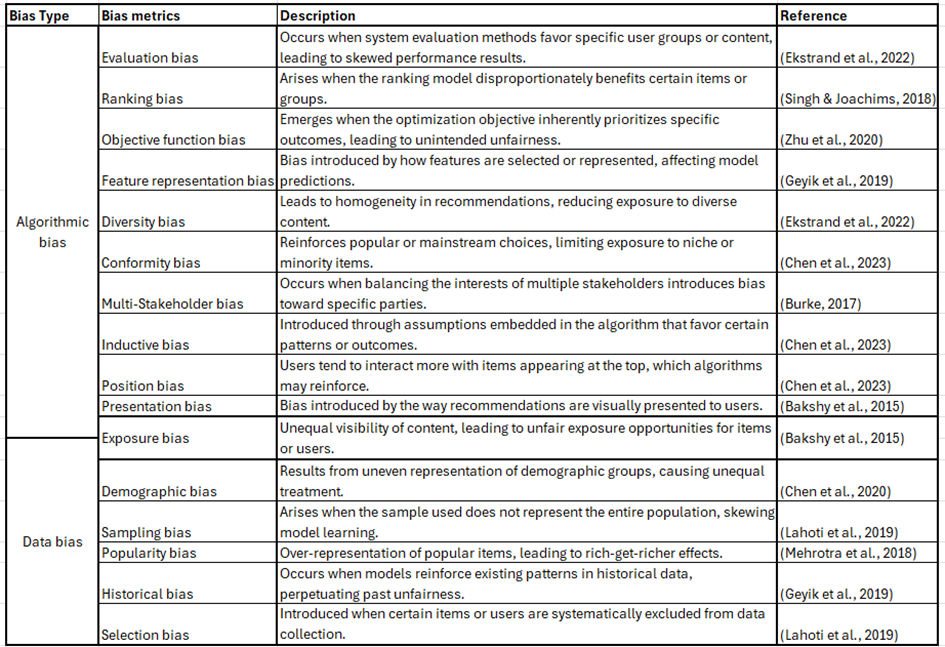

## 2.4 Feedback loops

Perhaps the most concerning aspect of bias in RSs is how it evolves and compounds through feedback loops. Once unfair patterns are established whether through algorithmic or data bias, they tend to reinforce themselves. Biased recommendations influence user behaviour, generating interaction data that reflects these biases. In turn, this data is used to train the next generation of models, deepening the unfairness over time (Ekstrand et al., 2018).

For instance, when popular items are consistently recommended and clicked, self-reinforcing disparities emerge, making it even harder for less popular content to surface (Singh & Joachims, 2018). Similarly, user behaviour amplification occurs when repetitive exposure to the same types of content shapes user preferences, narrowing their consumption patterns (Mehrotra et al., 2018).

These feedback loops demonstrate that fairness in RSs is not a static problem but a dynamic process where initial design choices and data limitations can escalate into systemic unfairness if left unaddressed.

## 2.5 Cold Start Problem

The cold start problem adds another layer of complexity to fairness challenges in RSs. When new users or new items enter the system, there is often insufficient data to generate personalized recommendations. As a result, the system tends to fall back on recommending popular or generic content, further entrenching popularity bias and limiting opportunities for new items or users to gain visibility (Li et al., 2023).

This phenomenon disproportionately affects minority users or niche content, making it difficult for them to compete on equal footing with established players. It also delays the system’s ability to learn about diverse preferences, worsening the overall fairness of recommendations.

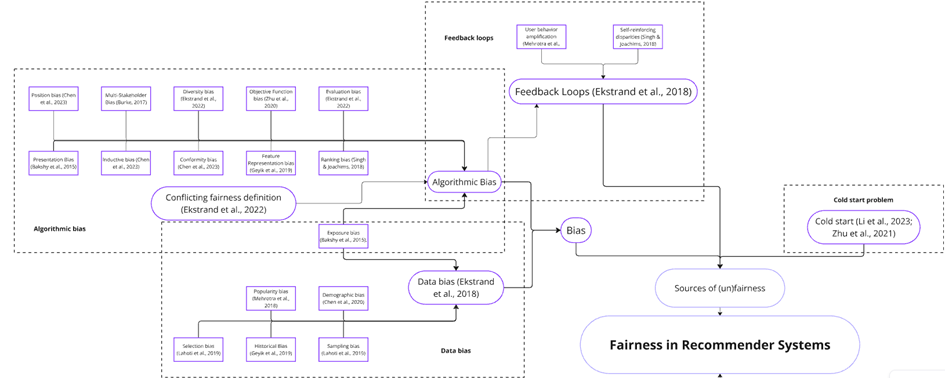

*Figure 1: Part of the conceptual model about sources of (un)fairness*


# 3. Conceptualizing fairness in recommendation systems

After understanding where unfairness originates, it is essential to establish a framework for what fairness means in the context of recommender systems. Given their role in shaping exposure, opportunities, and user experiences, fairness in RSs is both multi-dimensional and highly contextual. Fairness involves decisions about who deserves access to recommendations, how these are distributed, and whether the outcomes reinforce or reduce existing inequalities. This section conceptualizes fairness along key dimensions, as visualized in Figure 2.

## 3.1 Stakeholder perspectives on fairness

Fairness in recommender systems (RSs) is inherently relational, varying by stakeholder expectations. Users seek recommendations that match their preferences, provide diversity, and avoid discrimination, while content providers aim for visibility in competitive environments. Platforms prioritize engagement, profitability, and regulatory compliance (Deldjoo et al., 2024; Rampisela et al., 2024).

Literature identifies several stakeholder-specific fairness dimensions. **User fairness** focuses on providing relevant, diverse recommendations regardless of demographics or behavior (Wang et al., 2023). **Item fairness** ensures content is not systematically underexposed (Rampisela et al., 2024). **Provider fairness** emphasizes the visibility of creators competing for user attention (Singh & Joachims, 2018). **Platform fairness** involves balancing stakeholder demands while achieving organizational objectives (Chaudhari et al., 2020). **Multi-stakeholder fairness** acknowledges that these interests often conflict, requiring continuous negotiation (Burke, 2017).

## 3.2 Fairness over time

Fairness in recommender systems (RSs) is dynamic, evolving through repeated user interactions that continuously influence system data and potentially reinforce biases. **Temporal fairness**, often overlooked, addresses this evolving nature (Ekstrand et al., 2018).

Biega et al. (2018) differentiate between **short-term fairness**, which addresses immediate recommendation outcomes, and **long-term fairness**, which considers cumulative exposure imbalances that can systematically underrepresent certain items or groups. Li et al. (2023) emphasize that effective fairness interventions must address these long-term dynamics to prevent reinforcement of popularity biases. Ensuring fairness in RSs requires ongoing attention to how systems learn and adapt over time.

## 3.3 Process and outcome fairness

Fairness in recommender systems (RSs) involves **process fairness** and **outcome fairness**, two concepts from fairness-aware machine learning (Dwork et al., 2012; Mitchell et al., 2020). Process fairness ensures algorithms treat similar individuals similarly during training and prediction, achieved through fairness constraints, balanced data, or debiasing techniques (Ekstrand et al., 2022; Yao & Huang, 2017).

However, RSs often operate as black boxes, making process observation and intervention difficult. As a result, fairness assessments typically focus on outcomes, evaluating whether recommendations lead to unequal or discriminatory results for specific users or groups (Burke, 2017; Jin et al., 2023).

This review emphasizes outcome fairness, as it directly affects users and content providers, regardless of the system’s internal workings.

## 3.4 Operationalizing outcome fairness through distributive fairness

Outcome fairness in recommender systems (RSs) is often addressed through **distributive fairness**, which focuses on how limited resources such as recommendation slots and user attention are allocated (Singh et al., 2021). Rooted in economic theories of fairness, distributive fairness assesses equity by examining how benefits and burdens are shared among stakeholders (Chouldechova & Roth, 2020).

Distributive fairness serves as a foundational layer for evaluating fairness outcomes. It ensures that individual and group fairness metrics are applied to a balanced distribution of exposure and relevance. This approach is necessary because evaluating fairness outcomes requires first assessing whether the underlying distribution of resources is balanced. When distributions are skewed, outcome fairness cannot be accurately measured.

In the context of RSs, distributive fairness aims to prevent the excessive concentration of exposure on a limited set of users or items. Biega et al. (2018) emphasize the importance of **exposure fairness**, ensuring that minority content providers have fair opportunities to reach audiences. Without explicit fairness constraints, RSs tend to favor popular content, reinforcing inequalities over time (Diaz et al., 2020). Burke (2017) and Singh & Joachims (2018) demonstrate that distributive fairness metrics provide effective tools for auditing and enhancing fairness in RS outputs, particularly in large-scale platforms with intense competition for visibility.

## 3.5 Individual and group fairness within distributive fairness

Distributive fairness in recommender systems (RSs) distinguishes between **individual** and **group fairness**. **Individual fairness** ensures similar users receive comparable recommendations, maintaining relevance and diversity based on their preferences or behavior histories (Dwork et al., 2012). Lahoti et al. (2019) enhance this concept through **pairwise fairness** measures that capture subtle individual-level disparities.

**Group fairness** addresses aggregate outcomes across defined groups, aiming to prevent disparities in exposure. Methods include **disparate impact ratios** to measure exposure imbalances (Zafar et al., 2017) and **demographic parity**, which ensures recommendation probabilities are evenly distributed across groups (Feldman et al., 2015).

Chen et al. (2023) emphasize the need to balance individual and group fairness, noting that prioritizing group fairness can still result in unfair treatment of individuals. Burke (2017) highlights the complexity of designing fair systems that navigate these trade-offs effectively.

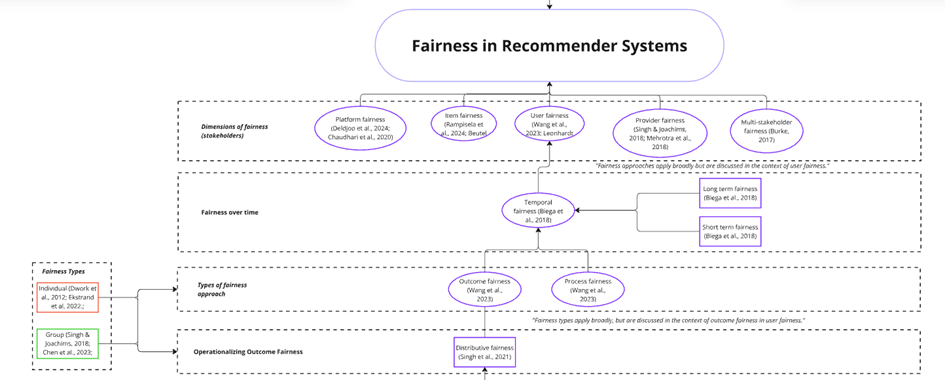

*Figure 2: Part of the conceptual model about concepts of fairness*


# 4. Fairness metrics in recommender systems

Fairness in recommender systems requires translating theoretical principles into measurable metrics to assess disparities and the impact of fairness interventions. As fairness is context-dependent, selecting appropriate metrics is crucial. This review follows Wang et al. (2023) in categorizing fairness metrics into six key dimensions while integrating insights from other studies on exposure fairness, demographic parity, and individual fairness. While Wang et al. (2023) provides this structure, the specific fairness metrics discussed in this review are drawn from a broader set of studies to ensure a more comprehensive evaluation.

### Why Fairness Metrics Matter?

Fairness metrics are critical because algorithmic biases in recommender systems can perpetuate societal inequalities, affecting job opportunities, financial access, and content visibility. Accurate metrics guide interventions to balance personalization, equity, and stakeholder interests. Systems optimized solely for engagement may disproportionately benefit certain groups, reinforcing existing disparities. Table 2 presents key fairness metrics categorized into individual, group, and bridging measures.

*Table 2 Fairness metrics*

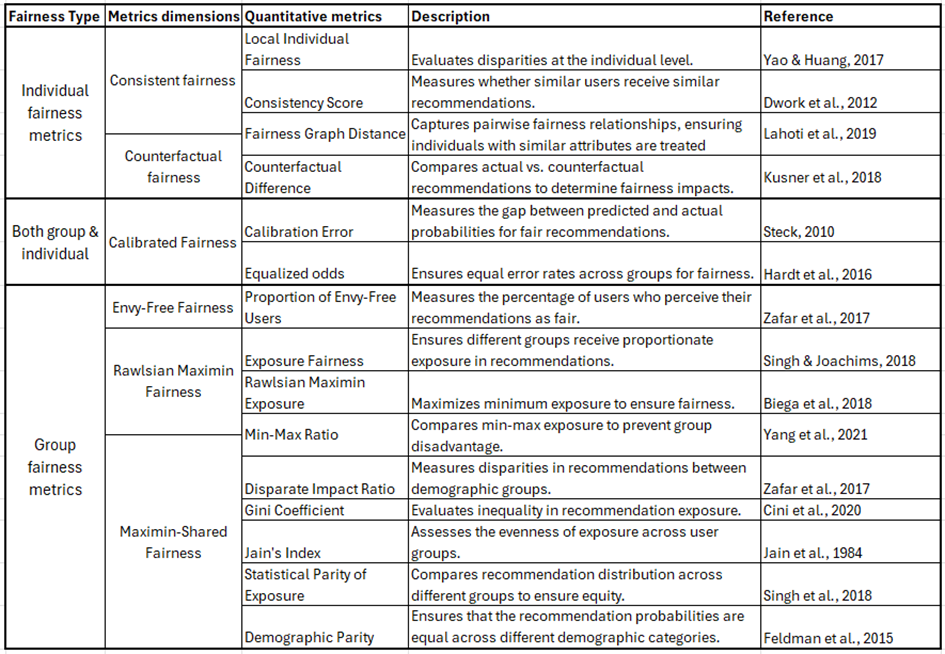

## 4.1 Individual Fairness Metrics in Practice

Ensuring fairness at the individual level means users with similar preferences and characteristics should receive comparable recommendations. Achieving this in real-world recommender systems is challenging due to complex user interactions and inherent biases in training data. Several metrics help assess individual fairness:

- **Local Individual Fairness** evaluates whether users with similar behaviors receive comparable recommendations. For example, two shoppers with nearly identical purchase histories should not receive drastically different product suggestions, as this may signal inconsistencies or biases in the recommendation model (Yao & Huang, 2017).

- **Consistency Score** measures whether small changes in user behavior lead to disproportionate shifts in recommendations. In personalized news feeds, reading a single article should not drastically alter future suggestions, as such abrupt changes can reinforce filter bubbles and limit exposure to diverse viewpoints (Dwork et al., 2012).

- **Fairness Graph Distance** analyzes relationships between users, ensuring that those with similar attributes receive proportionally similar recommendations. For instance, fairness audits on platforms like Spotify or Netflix can identify whether demographic groups with comparable histories receive systematically different recommendations, revealing biases in collaborative filtering models (Lahoti et al., 2019).

- **Counterfactual Difference** assesses how recommendations change when sensitive attributes, like gender or ethnicity, are altered. If a job recommendation platform offers different roles or salaries based on gender, counterfactual fairness is violated, potentially reinforcing workplace inequalities (Kusner et al., 2018).

These individual fairness metrics are crucial but may conflict with group fairness goals, where broader systemic disparities require adjustments. Thus, achieving fairness in RSs requires balancing personalized recommendations with addressing biases at both individual and group levels.

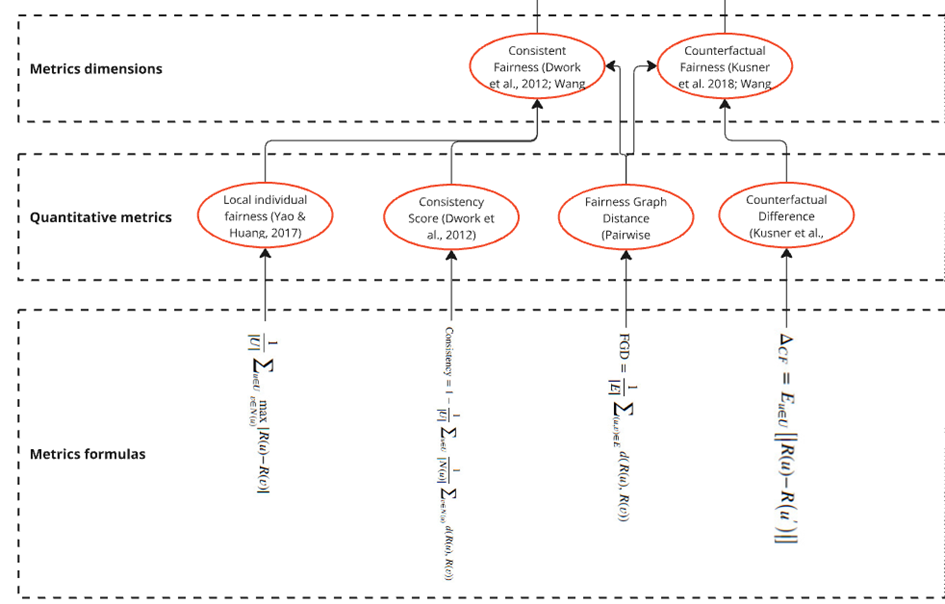

*Figure 3 Individual fairness metrics*

## 4.2 Group Fairness Metrics in Practice

While individual fairness ensures users receive personalized recommendations without arbitrary disparities, group fairness focuses on equity across demographic or content groups. Recommender systems often reinforce pre-existing societal biases, necessitating metrics to assess equitable distribution across groups.

- **Exposure bias** is a major concern in group fairness, where popular content dominates recommendations, limiting visibility for niche creators. This is evident on platforms like YouTube and TikTok, where trending content overshadows minority creators. Exposure fairness metrics help ensure that underrepresented creators still gain visibility, promoting a balanced distribution (Singh & Joachims, 2018).

- **Rawlsian Maximin Exposure** guarantees that even the least advantaged content or users receive exposure, preventing systemic bias in job recommendations, for example, on platforms like LinkedIn (Biega et al., 2018). However, prioritizing exposure fairness can sometimes reduce recommendation accuracy, as underrepresented content may detract from high-engagement items.

- **Min-Max Ratio** helps detect systemic bias in advertising and financial services, where high-paying jobs or financial opportunities disproportionately target specific demographics (Yang et al., 2021; Wang et al., 2023). 

- **Disparate Impact Ratio** detects indirect discrimination in loan recommendations or credit scoring, even when race or gender are not explicitly used as features (Zafar et al., 2017).

- **Proportion of Envy-Free Users** measures how users perceive fairness in outcomes. In platforms like ride-sharing or food delivery, consistently fewer requests for certain drivers or restaurants, despite similar service quality, can create a sense of unfairness (Zafar et al., 2017). Optimizing this metric may, however, limit user-driven personalization, reducing engagement.

- **Statistical Parity** ensures recommendations are equally distributed across groups, particularly relevant in news recommendation systems where exposure bias can dominate certain viewpoints (Singh et al., 2018). Enforcing statistical parity may reduce personalization quality, as it prioritizes diversity over user preferences.

- **Demographic Parity** ensures equal recommendation probabilities across demographic groups, helping prevent biased exposure in job recommendations (Feldman et al., 2015). Enforcing demographic parity may, however, hinder the system’s ability to optimize recommendations based on user behavior, potentially impacting user satisfaction.

- **Gini Coefficient** and **Jain’s Index** assess inequality in recommendation exposure, detecting whether a small group of top artists dominates streams, limiting diversity (Cini et al., 2020; Jain et al., 1984; Wang et al., 2023).

These group fairness metrics highlight the challenge of balancing fairness, personalization, and efficiency in RSs. While fairness interventions improve equity, they introduce trade-offs that may affect recommendation quality and user engagement. Context-aware metric selection is essential to ensure that fairness interventions align with platform goals and stakeholder needs while addressing biases.

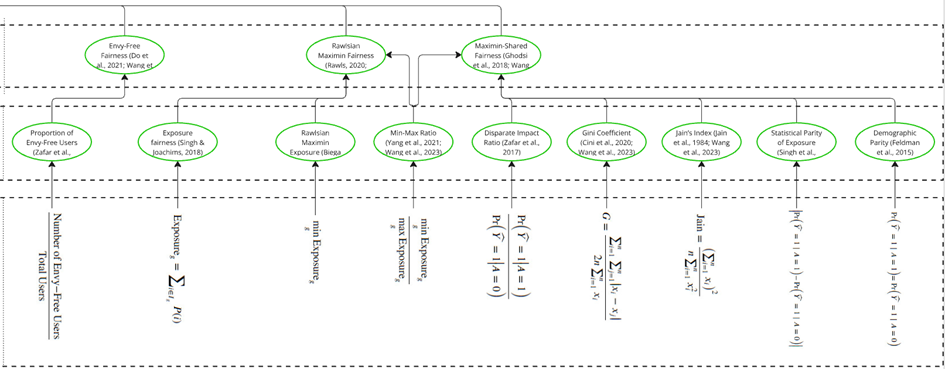

*Figure 4 Group fairness metrics*

## 4.3 Bridging Metrics: Balancing Personalization and Group Equity

Some metrics bridge individual and group fairness, offering balanced perspectives, especially in sensitive domains like healthcare or finance.

- **Calibrated Fairness** is vital in health recommender systems suggesting preventive care or health screenings. If the system predicts that a group needs care but systematically under-recommends it, calibration error is high, potentially worsening health disparities.

- **Equalized Odds** is crucial in credit card or loan recommendations, ensuring that error rates (false positives or false negatives) are consistent across protected groups. For example, if minority applicants are more likely to be falsely rejected, equalized odds metrics expose this unfairness.

With Yelp for individual look at the ratings history and their patterns and look if they are getting the same recommendation.

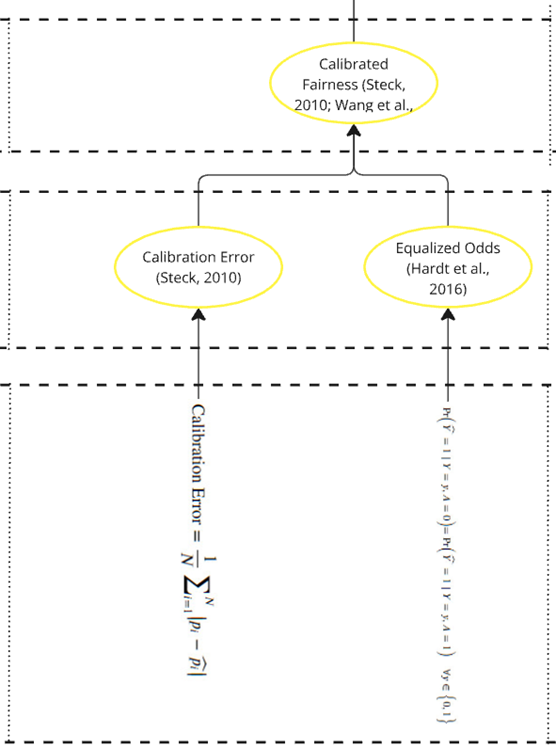

*Figure 5 Individual & group metrics*

### 4.3.1 Conflicting Metrics and Practical Challenges

A major challenge in fairness evaluation is the trade-off between accuracy and fairness. While enforcing demographic parity can reduce biases in job recommendations (Feldman et al., 2015), it may lower the model’s ability to optimize for relevance, affecting user satisfaction. Similarly, exposure fairness may help underrepresented creators gain visibility but could lower engagement on content platforms (Singh & Joachims, 2018).

Beyond trade-offs, practical challenges include measuring fairness at scale, defining fairness in diverse global markets, and addressing data sparsity issues in cold-start scenarios. Moreover, fairness interventions may require compliance with regulatory frameworks, such as the EU AI Act, which imposes constraints on algorithmic decision-making in high-risk domains.

### 4.4 Summary of Fairness Metrics in Action

Fairness metrics in recommender systems serve distinct but interdependent roles. Individual fairness safeguards personalized experiences by preventing arbitrary treatment, while group fairness mitigates systemic biases, ensuring equitable exposure and opportunities across user and content groups. Bridging metrics like calibration and equalized odds help balance personalization and fairness, particularly in high-stakes domains.

These metrics do not operate in isolation. Enhancing exposure fairness for underrepresented groups may reduce individual recommendation accuracy, while prioritizing individual fairness could unintentionally reinforce existing group disparities. While fairness interventions aim to promote equity, different applications require different priorities. In loan approvals, fairness often focuses on avoiding disparate impact (Zafar et al., 2017), whereas in entertainment platforms, exposure fairness may be a greater concern (Cini et al., 2020). Evaluating fairness in practice requires domain-specific considerations.

*Table 3 Formulas of the metrics*

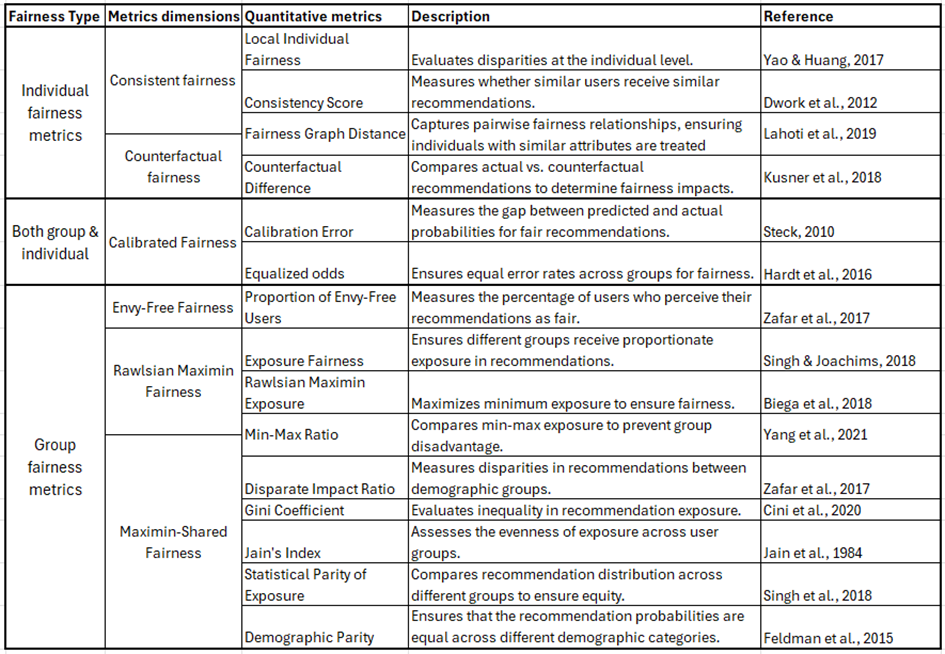

### 4.5 Formula explanation

Based on the metrics identified in the literature and considering the two datasets (MovieLens and Yelp), eight fairness metrics are selected for this study. Below, each metric is explained along with its mathematical formulation and the required components to measure fairness in RSs.

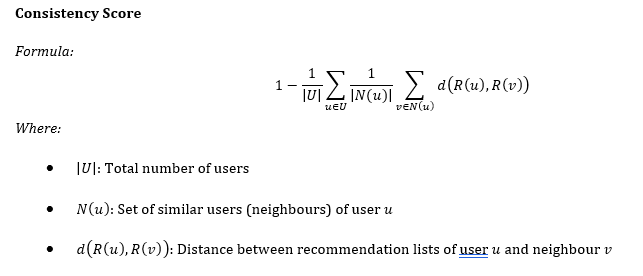

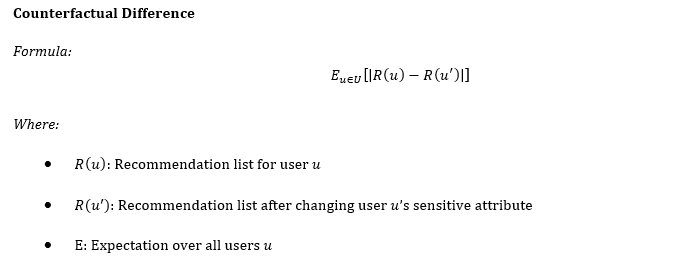

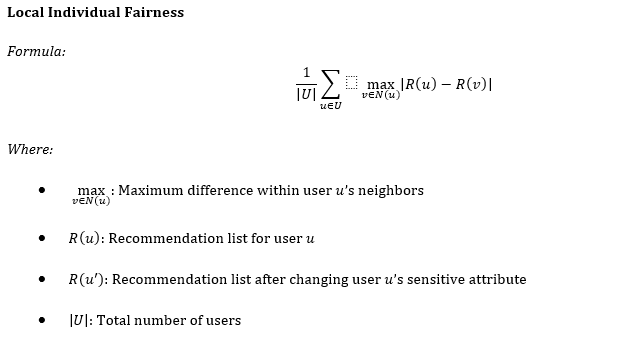

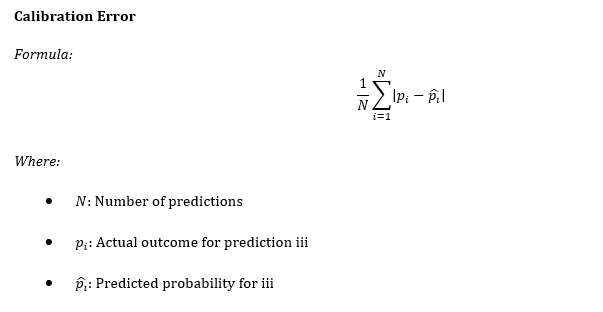

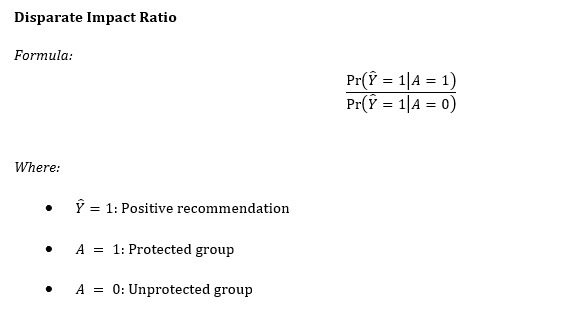

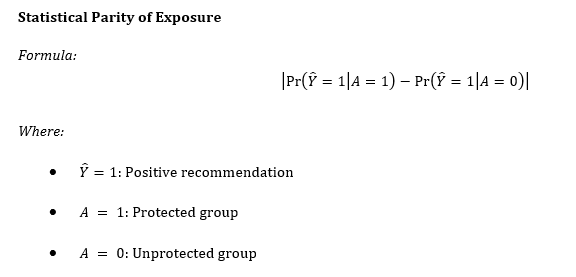

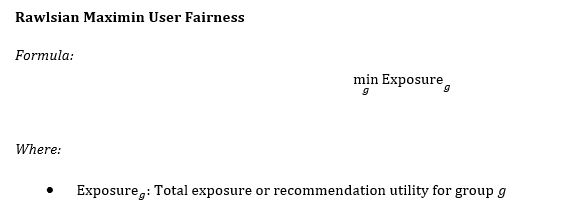

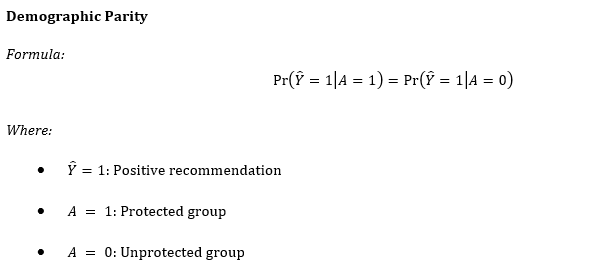

# 5. Conclusion

Fairness in recommender systems remains a multifaceted challenge, requiring careful balancing between personalization, equity, and efficiency. As explored in this review, bias in RSs emerges from multiple sources, including algorithmic design, data limitations, and long-term feedback loops. These biases can reinforce societal inequalities, influencing access to job opportunities, financial services, and digital content visibility.

To address these concerns, fairness metrics play a critical role in evaluating and mitigating bias. Individual fairness metrics ensure that users with similar preferences receive comparable recommendations, reducing arbitrary discrepancies. Group fairness metrics help correct systemic imbalances, preventing historically disadvantaged groups from being overlooked. Bridging metrics, such as calibrated fairness and equalized odds, provide a middle ground between ensuring fair outcomes while maintaining personalization.

However, fairness in RSs is not a one-size-fits-all solution. Implementing fairness interventions requires navigating trade-offs—enhancing fairness may come at the cost of recommendation accuracy, engagement, or platform revenue. Furthermore, conflicting fairness objectives often arise, as fairness for users may not align with fairness for content providers or platforms.

Given these complexities, future research and industry practices must focus on dynamic, context-aware approaches to fairness. This includes developing adaptive fairness mechanisms, refining evaluation frameworks, and ensuring compliance with ethical and regulatory guidelines. As RSs continue to shape online experiences, fairness must remain a core design principle to foster equitable and inclusive digital ecosystems.


# References

Bakshy, E., Messing, S., & Adamic, L. A. (2015). Exposure to ideologically diverse news and opinion on Facebook. *Science*, 1130–1132.

Biega, A. J., Gummadi, K. P., & Weikum, G. (2018). Equity of Attention: Amortizing Individual Fairness in Rankings. *The 41st International ACM SIGIR Conference on Research & Development in Information Retrieval*, 405–414. New York: ACM.

Burke, R. (2017). Multisided Fairness for Recommendation. *arXiv preprint arXiv*.

Chakraborty, A., & Gummadi, K. P. (2020). Fairness in Algorithmic Decision Making. *Proceedings of the 7th ACM IKDD CoDS and 25th COMAD*, 367–368. New York: Association for Computing Machinery.

Chen, J., Dong, H., Wang, X., Feng, F., Wang, M., & He, X. (2023). Bias and Debias in Recommender System: A Survey and Future Directions. *ACM Transactions on Information Systems*.

Deldjoo, Y., Jannach, D., Bellogín, A., D'Afonzo, A., & Zanoncelli, D. (2024). Fairness in recommender systems: research landscape and future directions. *User Modeling and User-Adapted Interaction*, 59–108.

Dwork, C., Hardt, M., Pitassi, T., Reingold, O., & Zemel, R. (2012). Fairness through awareness. *Proceedings of the 3rd Innovations in Theoretical Computer Science Conference*, 214–226. New York: ACM.

Ekstrand, M. D., Das, A., Burke, R., & Diaz, F. (n.d.). Fairness in Information Access Systems. *Foundations and Trends in Information Retrieval*, 1–177.

Ekstrand, M. D., Tian, M., Azpiazu, I. M., Ekstrand, J. D., Anuyah, O., McNeill, D., & Pera, M. S. (2018). All the Cool Kids, How Do They Fit In?: Popularity and Demographic Biases in Recommender Evaluation and Effectiveness. *Proceedings of the 1st Conference on Fairness, Accountability and Transparency*. PMLR.

Geyik, S. C., Ambler, S., & Kenthapadi, K. (2019). Fairness-Aware Ranking in Search & Recommendation Systems with Application to LinkedIn Talent Search. *Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*, 2221–2231.

Jain, L., Zhang, H., Zheng, Y., Ding, W., Xia, F., & Pan, S. (2023). A survey on fairness-aware recommender systems. *Information Fusion*.

Kamishima, T., Akaho, S., & Sakuma, J. (2011). Fairness-aware Learning through Regularization Approach. *2011 IEEE 11th International Conference on Data Mining Workshops*, 643–650. Vancouver: IEEE.

Kusner, M. J., Loftus, J. R., Russell, C., & Silva, R. (2017). Counterfactual Fairness. *Advances in Neural Information Processing Systems*.

Lahoti, P., Gummadi, K. P., & Weikum, G. (2019). Operationalizing Individual Fairness with Pairwise Fair Representations. *Proceedings of the VLDB Endowment*, 506–518.

Li, Y., Chen, H., Xu, S., Ge, Y., Tan, J., Liu, S., & Zhang, Y. (2023). Fairness in recommendation: Foundations, Methods and Applications. *ACM Transactions on Intelligent Systems and Technology*, 1–48.

Mehrotra, R., McInerney, J., Bouchard, H., Lalmas, M., & Diaz, F. (2018). Towards a Fair Marketplace: Counterfactual Evaluation of the Trade-off between Relevance, Fairness & Satisfaction in Recommendation Systems. *Proceedings of the 27th ACM International Conference on Information and Knowledge Management*, 2243–2251. New York: ACM.

Mitchell, S., Potash, E., Barocas, S., D'Amour, A., & Lum, K. (2021). Prediction-Based Decisions and Fairness: A Catalogue of Choices, Assumptions, and Definitions. *Annual Review of Statistics and Its Application*, 141–163.

Mukherjee, D., Yurochkin, M., Banerjee, M., & Sun, Y. (2020). Two Simple Ways to Learn Individual Fairness Metrics from Data. *Proceedings of the 37th International Conference on Machine Learning*, 7097–7107. PMLR.

Pitoura, E., Stefanidis, K., & Koutrika, G. (2022). Fairness in rankings and recommendations: an overview. *The VLDB Journal*, 431–456.

Rampisela, T. V., Maistro, M., Ruotsalo, T., & Lioma, C. (2025). Evaluation Measures of Individual Item Fairness for Recommender Systems: A Critical Study. *ACM Transactions on Recommender Systems*, 1–52.

Raza, S. (2024). Bias Reduction News Recommendation System. *Diggit*, 92–103.

Singh, A., & Joachims, T. (2018). Fairness of Exposure in Rankings. *Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*, 2219–2228. New York: ACM.

Vardasbi, A., de Rijke, M., Diaz, F., & Dehghani, M. (2024). The Impact of Group Membership Bias on the Quality and Fairness of Exposure in Ranking. *Proceedings of the 47th International ACM SIGIR Conference on Research and Development in Information Retrieval*, 1514–1524. New York: ACM.

Wang, Y., Ma, W., Zhang, M., Liu, Y., & Ma, S. (2023). A Survey on the Fairness of Recommender Systems. *ACM Transactions on Information Systems*, 1–43.

Yao, S., & Huang, B. (2017). Beyond parity: Fairness objectives for collaborative filtering. *Advances in Neural Information Processing Systems*.

Zhu, Z., Wang, J., & Caverlee, J. (2020). Measuring and Mitigating Item Under-Recommendation Bias in Personalized Ranking Systems. *Proceedings of the 43rd International ACM SIGIR Conference on Research and Development in Information Retrieval*, 449–458. Virtual Event China: ACM.
